> # Import Modules

In [1]:
import sys
import os
import pandas as pd
import seaborn as sns
import pandas as pd
from sklearn.datasets import fetch_california_housing

module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)

from noventis.predictor import NoventisManualML
print('Successfully imported modules!')

Successfully imported modules!


> # Prepare for Data Frame

<h2> Classification

In [2]:
df_titanic = sns.load_dataset('titanic')

df_titanic_clean = df_titanic.drop(columns=['deck', 'embark_town', 'alive'])
df_titanic_clean = df_titanic_clean.dropna()

In [3]:
df_titanic_clean

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,True
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,True


<h2> Regression

In [4]:
housing = fetch_california_housing()

df_housing = pd.DataFrame(housing.data, columns=housing.feature_names)
df_housing['MedHouseVal'] = housing.target 

In [5]:
df_housing

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


> # The Full Experience (Default)

<h2> Classfication

INFO:root:ManualPredictor initialized for classification
INFO:root:Starting ManualPredictor Training Pipeline
INFO:root:Data split: Train=569, Test=143
INFO:root:Running internal preprocessor...
INFO:root:Internal preprocessing complete. All data is now numeric.
INFO:root:Processing model: LOGISTIC_REGRESSION
INFO:root:Training finished in 0.05 seconds.
INFO:root:Processing model: RANDOM_FOREST
INFO:root:Training finished in 0.19 seconds.
INFO:root:Processing model: LIGHTGBM
  File "c:\Users\LENOVO\anaconda3\envs\env_noventis\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\LENOVO\anaconda3\envs\env_noventis\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\LENOVO\anaconda3\envs\env_noventis\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable

,accuracy,precision,recall,f1_score
model,,,,
logistic_regression,0.8182,0.8182,0.8182,0.8115
lightgbm,0.7972,0.7959,0.7972,0.7865
random_forest,0.7483,0.7517,0.7483,0.7416

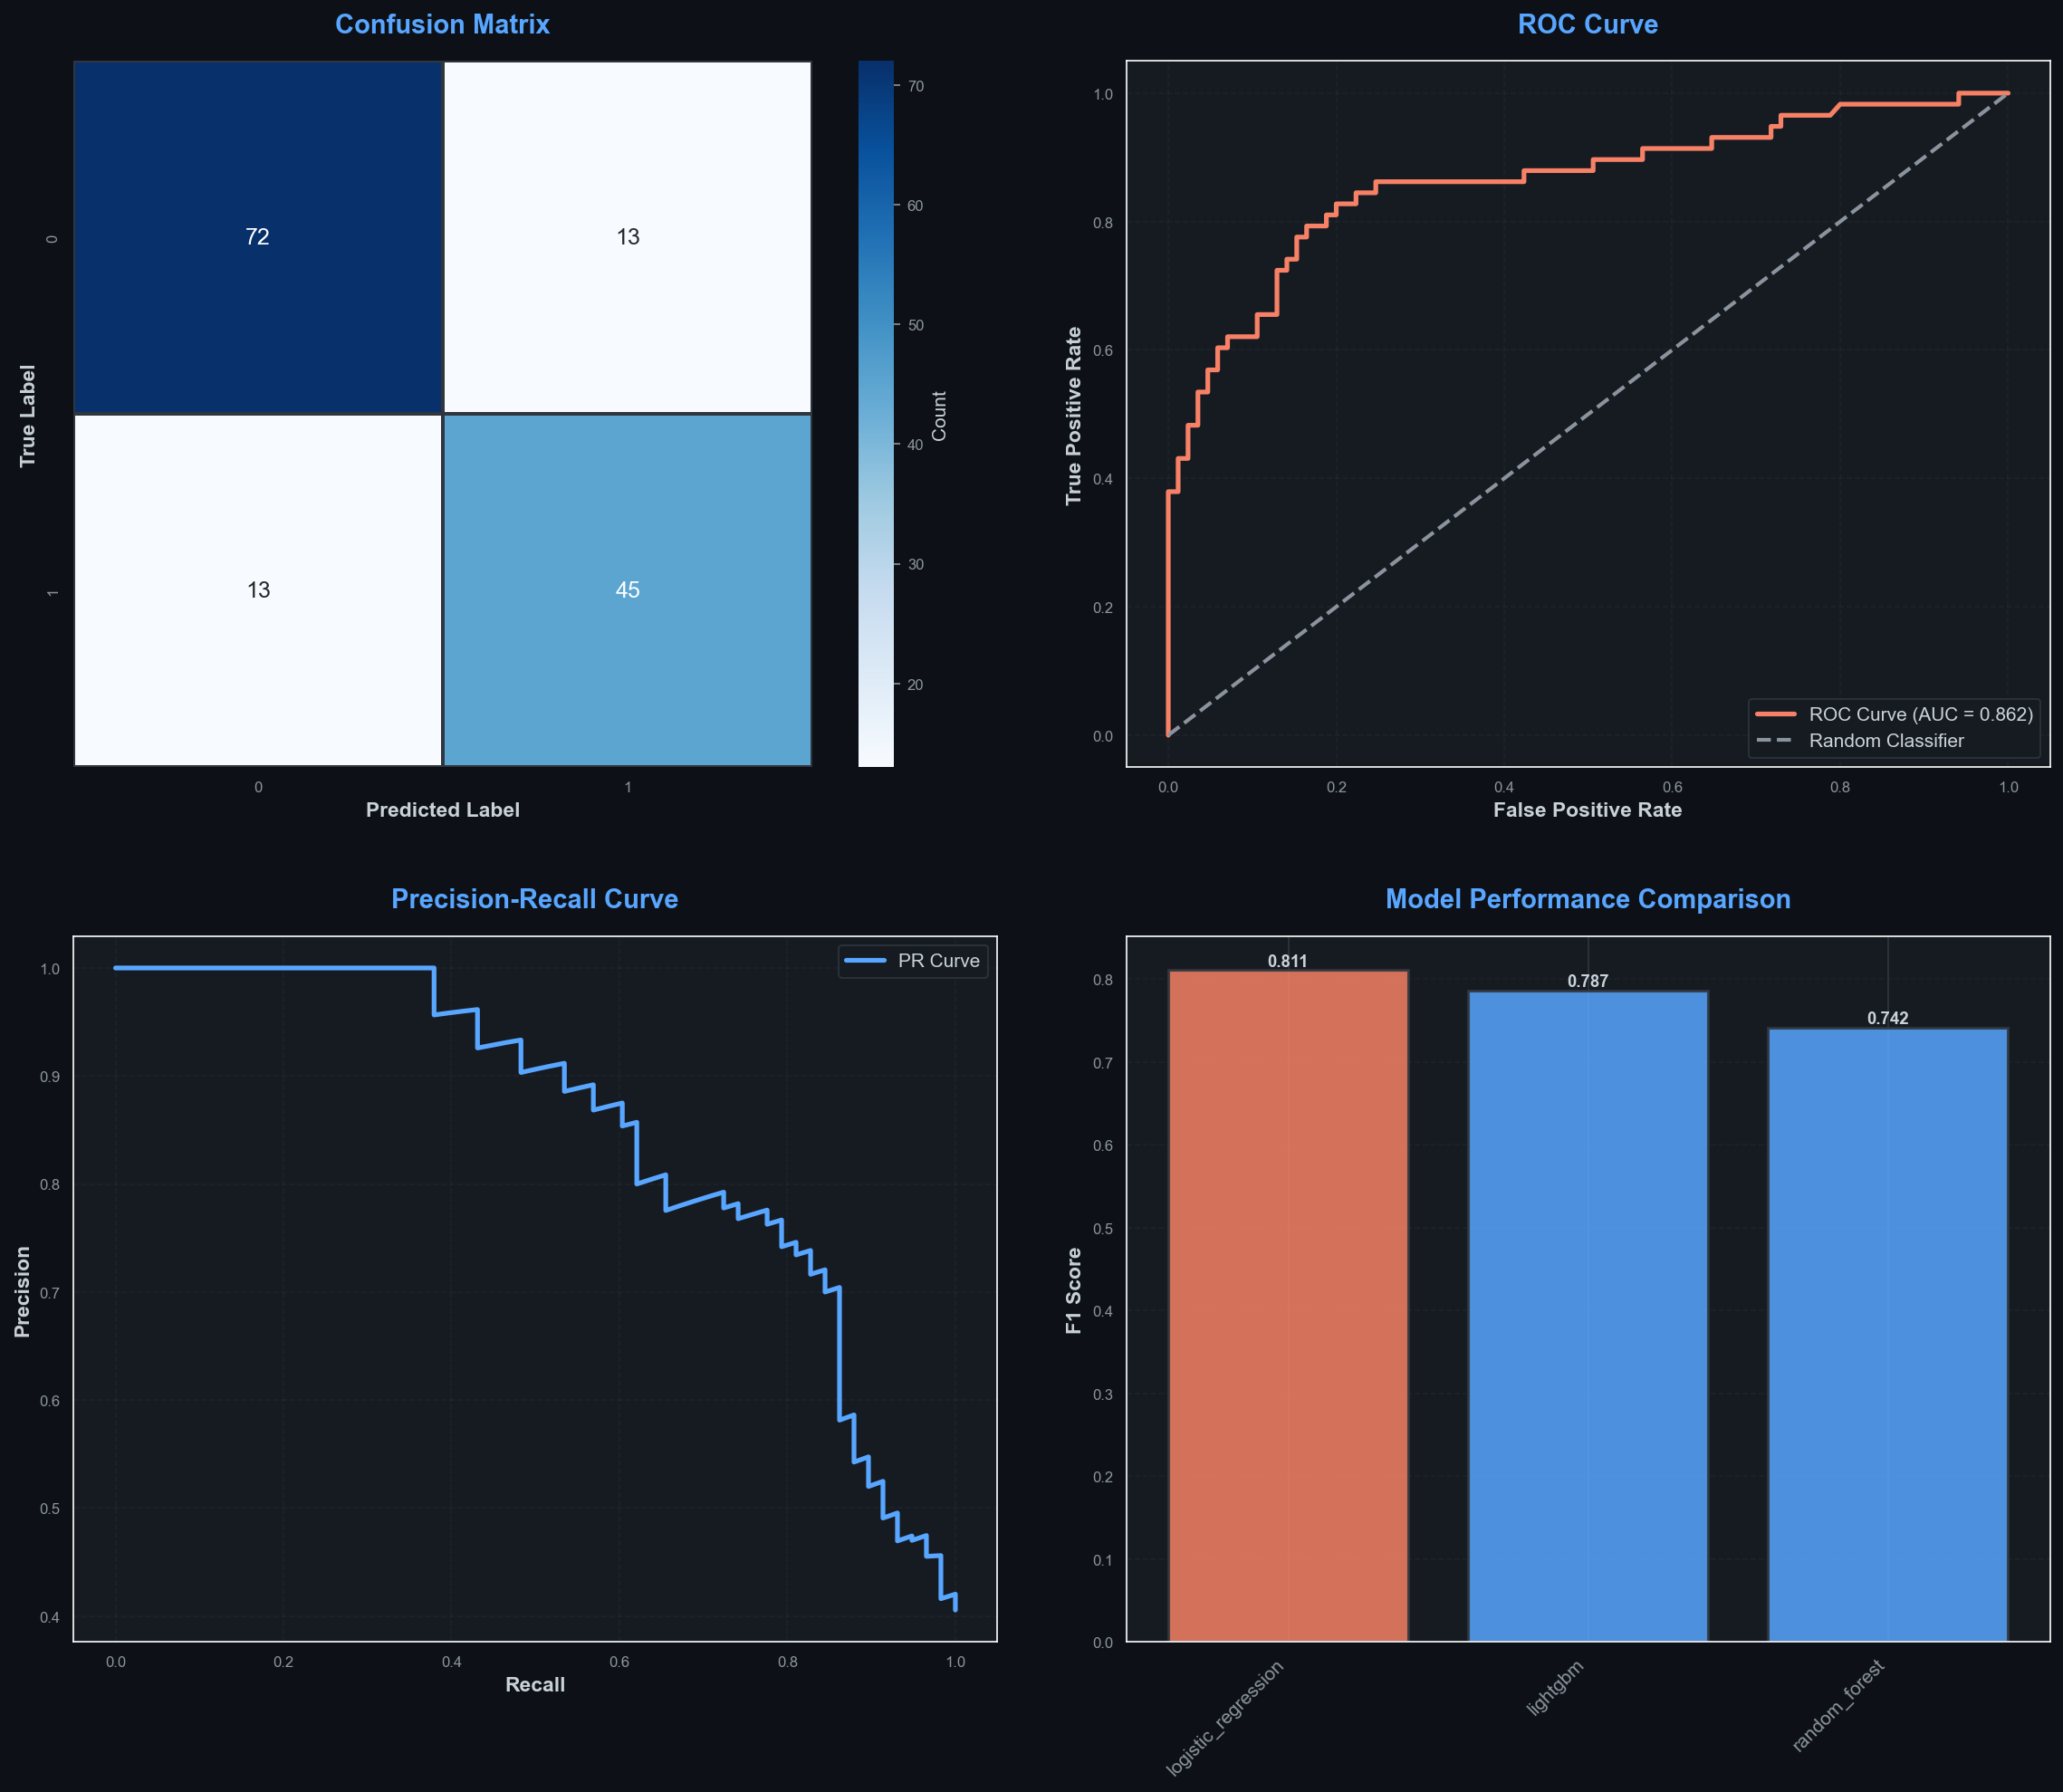
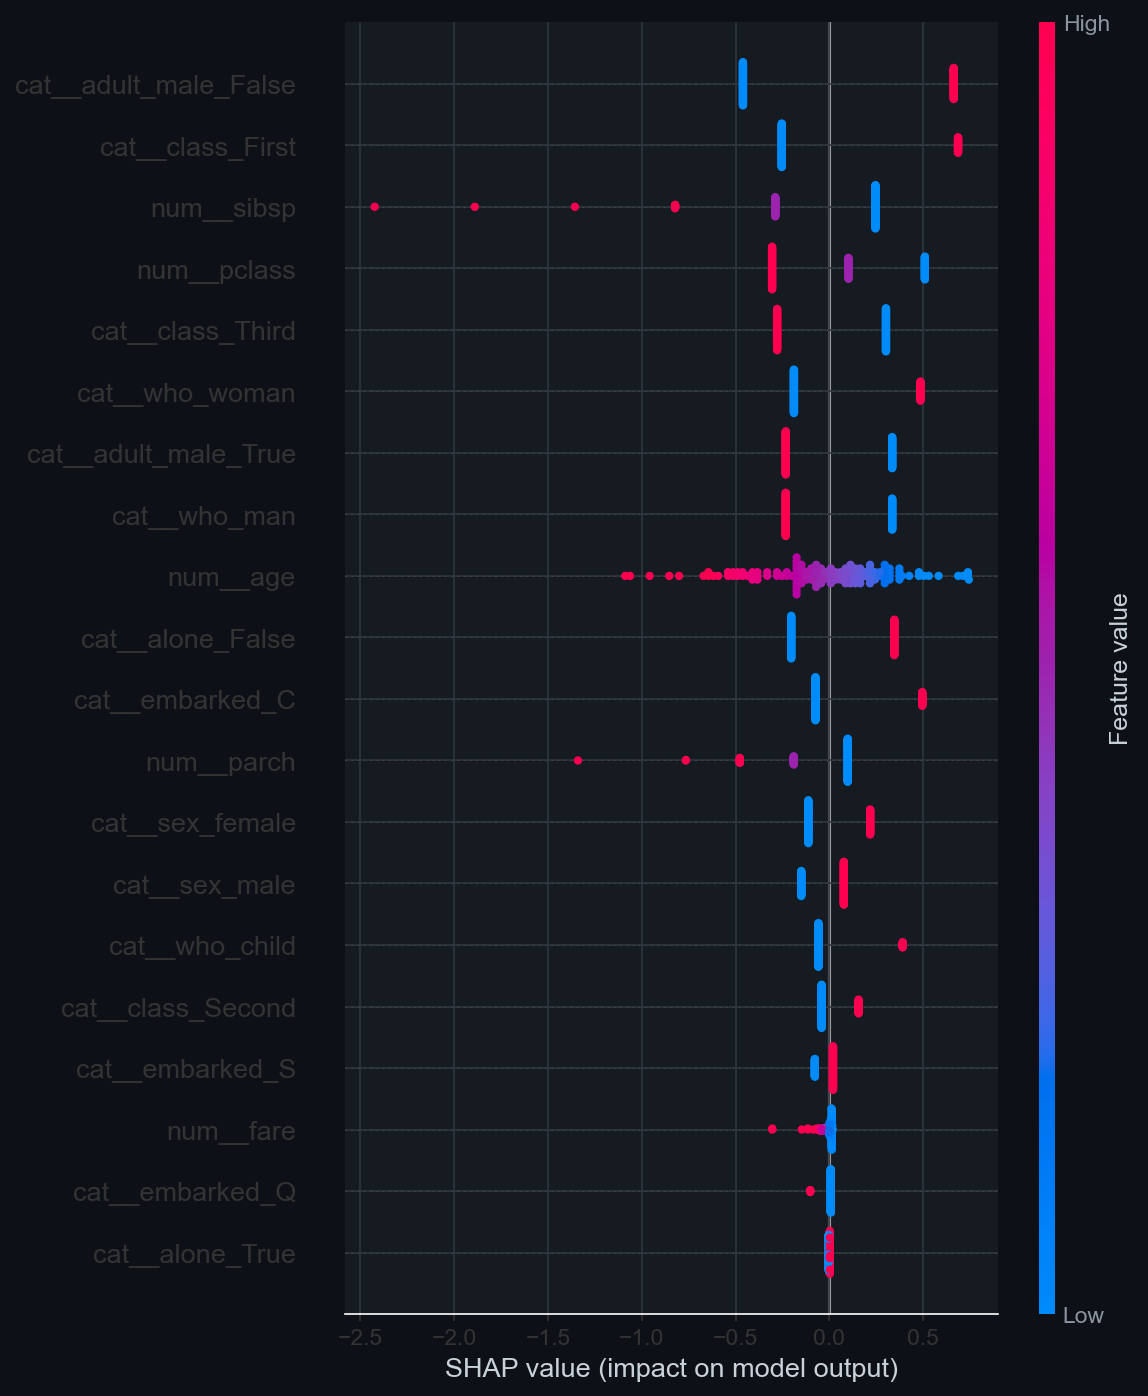

INFO:root:Report displayed successfully.


In [6]:
manualml = NoventisManualML(
    model_name=['logistic_regression', 'random_forest', 'lightgbm'],
    task='classification',
)

results = manualml.fit(
    df=df_titanic_clean,
    target_column='survived',
)

<h2> Regression

INFO:root:ManualPredictor initialized for regression
INFO:root:Starting ManualPredictor Training Pipeline
INFO:root:Data split: Train=16512, Test=4128
INFO:root:Running internal preprocessor...
INFO:root:Internal preprocessing complete. All data is now numeric.
INFO:root:Processing model: LINEAR_REGRESSION
INFO:root:Training finished in 0.01 seconds.
INFO:root:Processing model: RANDOM_FOREST
INFO:root:Training finished in 32.05 seconds.
INFO:root:Processing model: LIGHTGBM
INFO:root:Training finished in 0.12 seconds.
INFO:root:Process Complete!
INFO:root:Best Model: LIGHTGBM with r2_score = 0.8360
INFO:root:Preparing report for display in output cell...
 99%|===================| 4076/4128 [00:16<00:00]        

,mae,mse,rmse,r2_score
model,,,,
lightgbm,0.3078,0.2148,0.4635,0.8360
random_forest,0.3275,0.2554,0.5053,0.8051
linear_regression,0.5332,0.5559,0.7456,0.5758

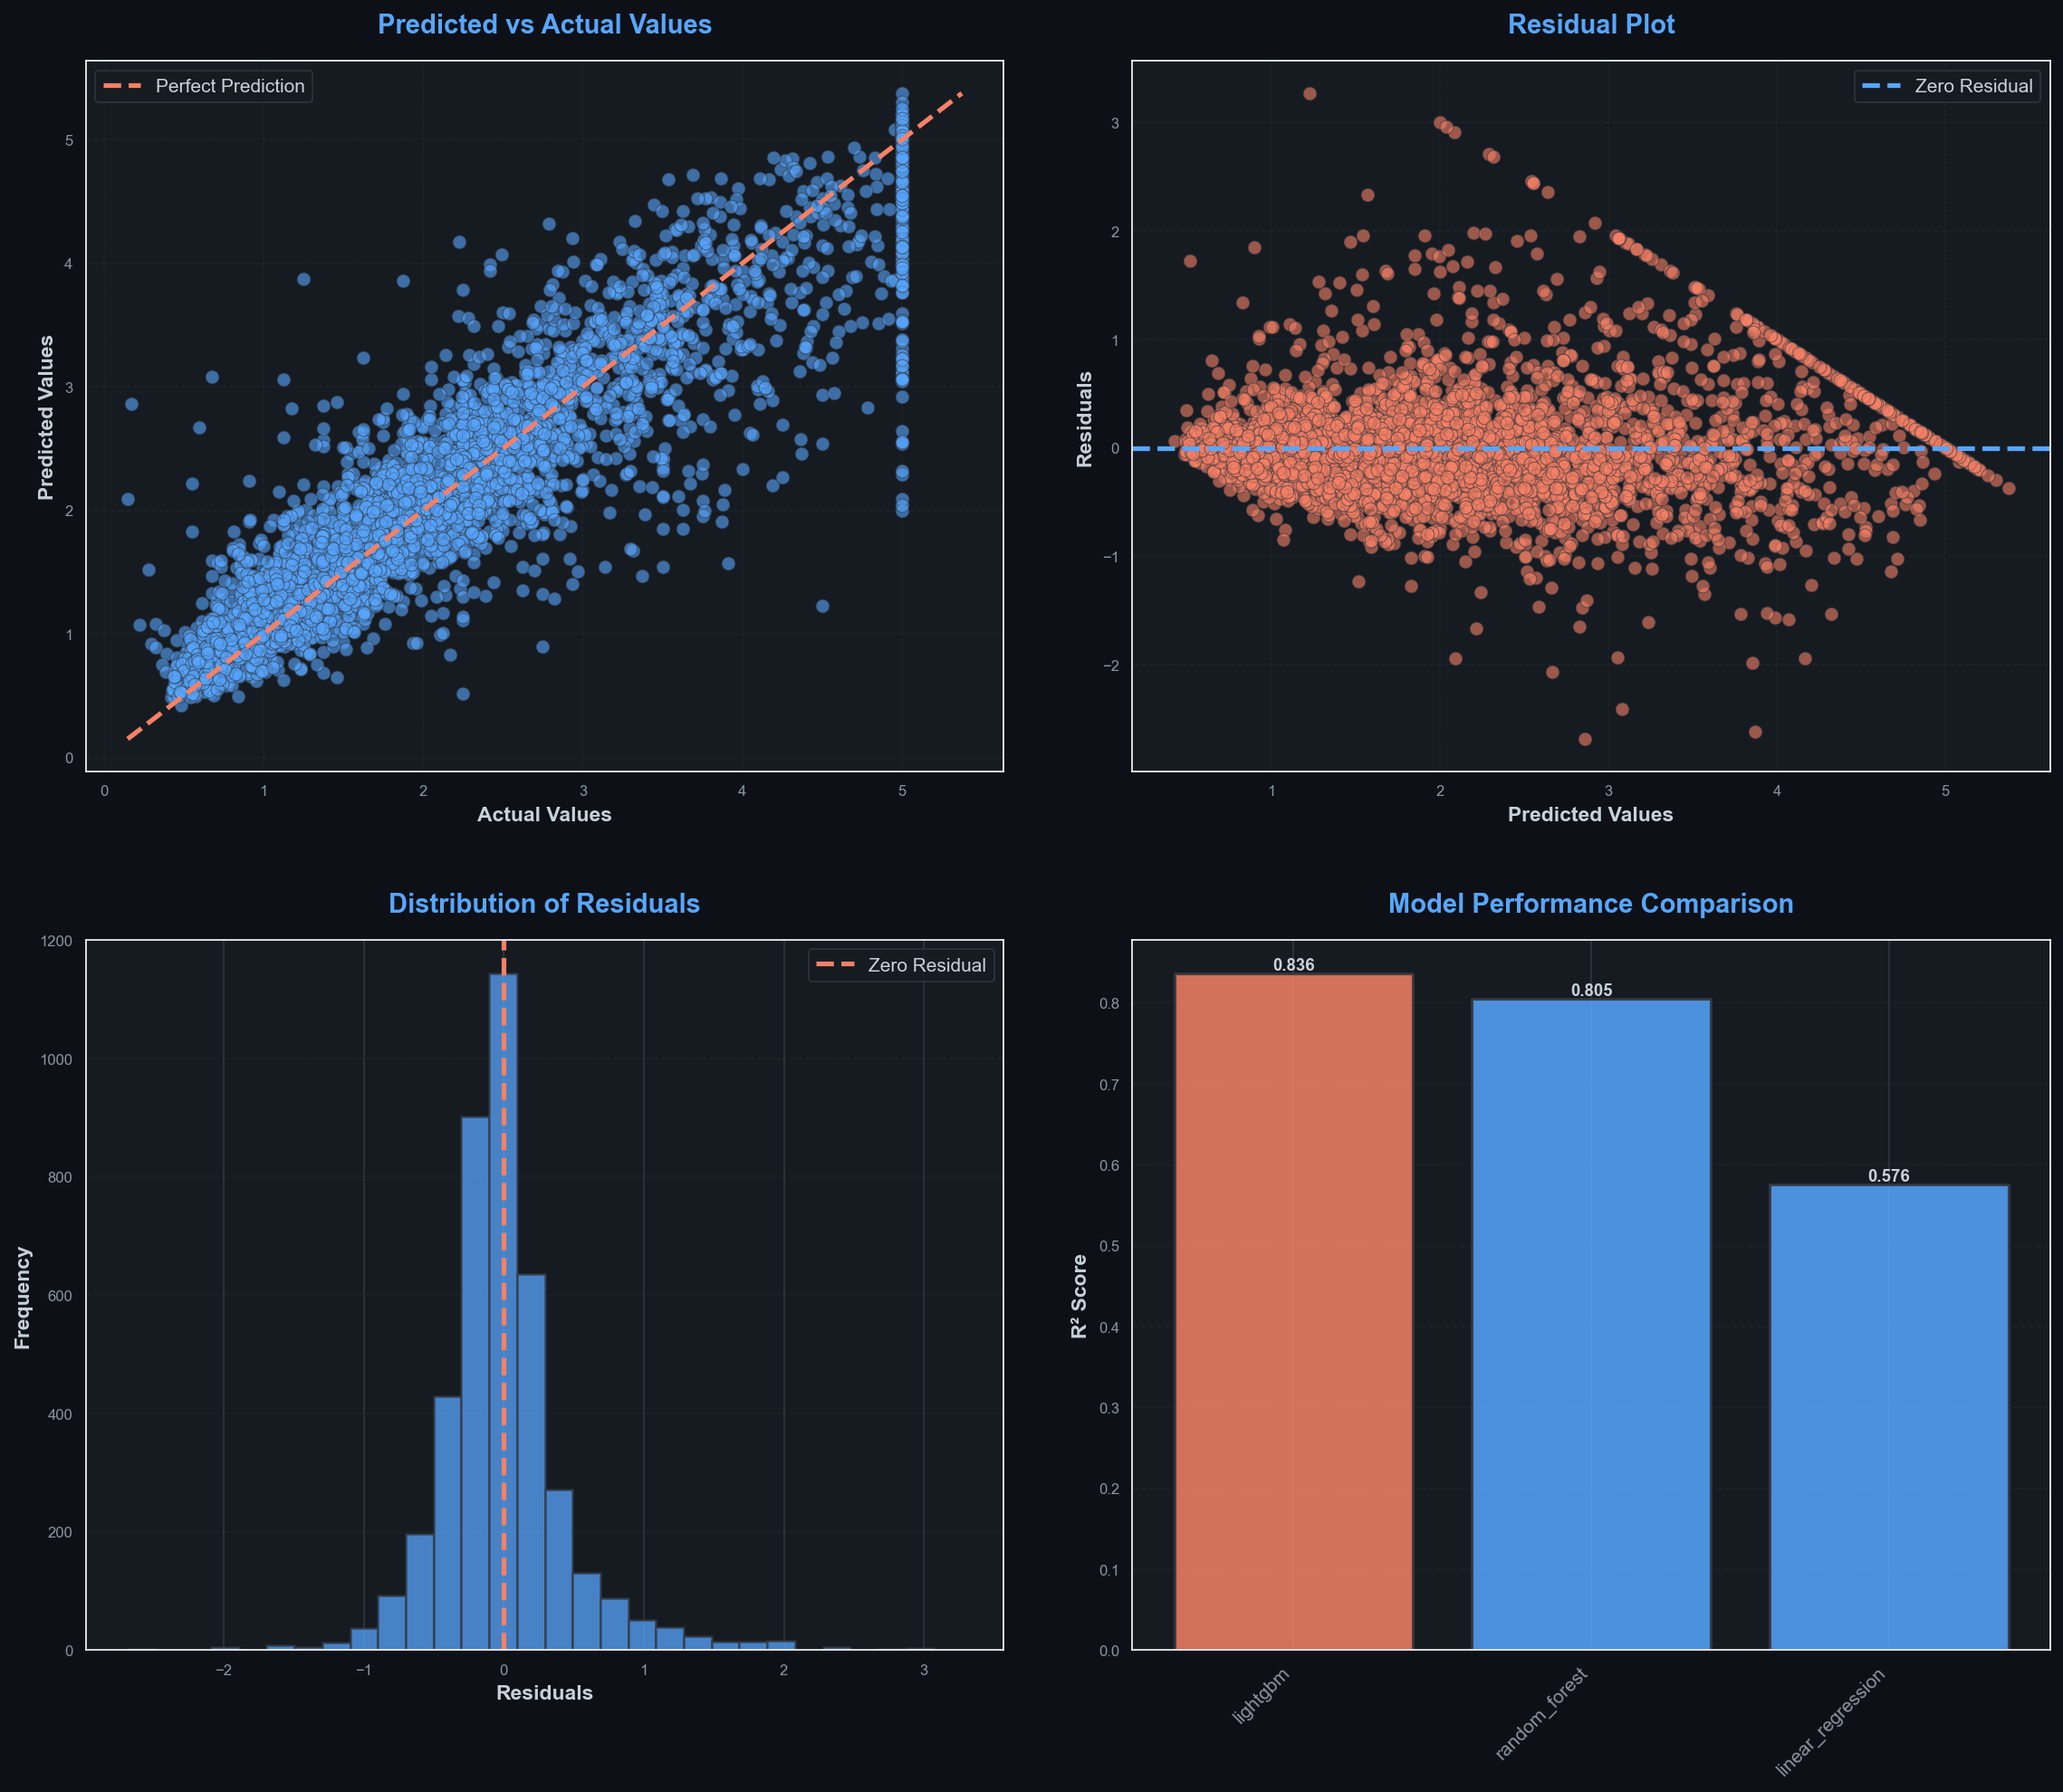
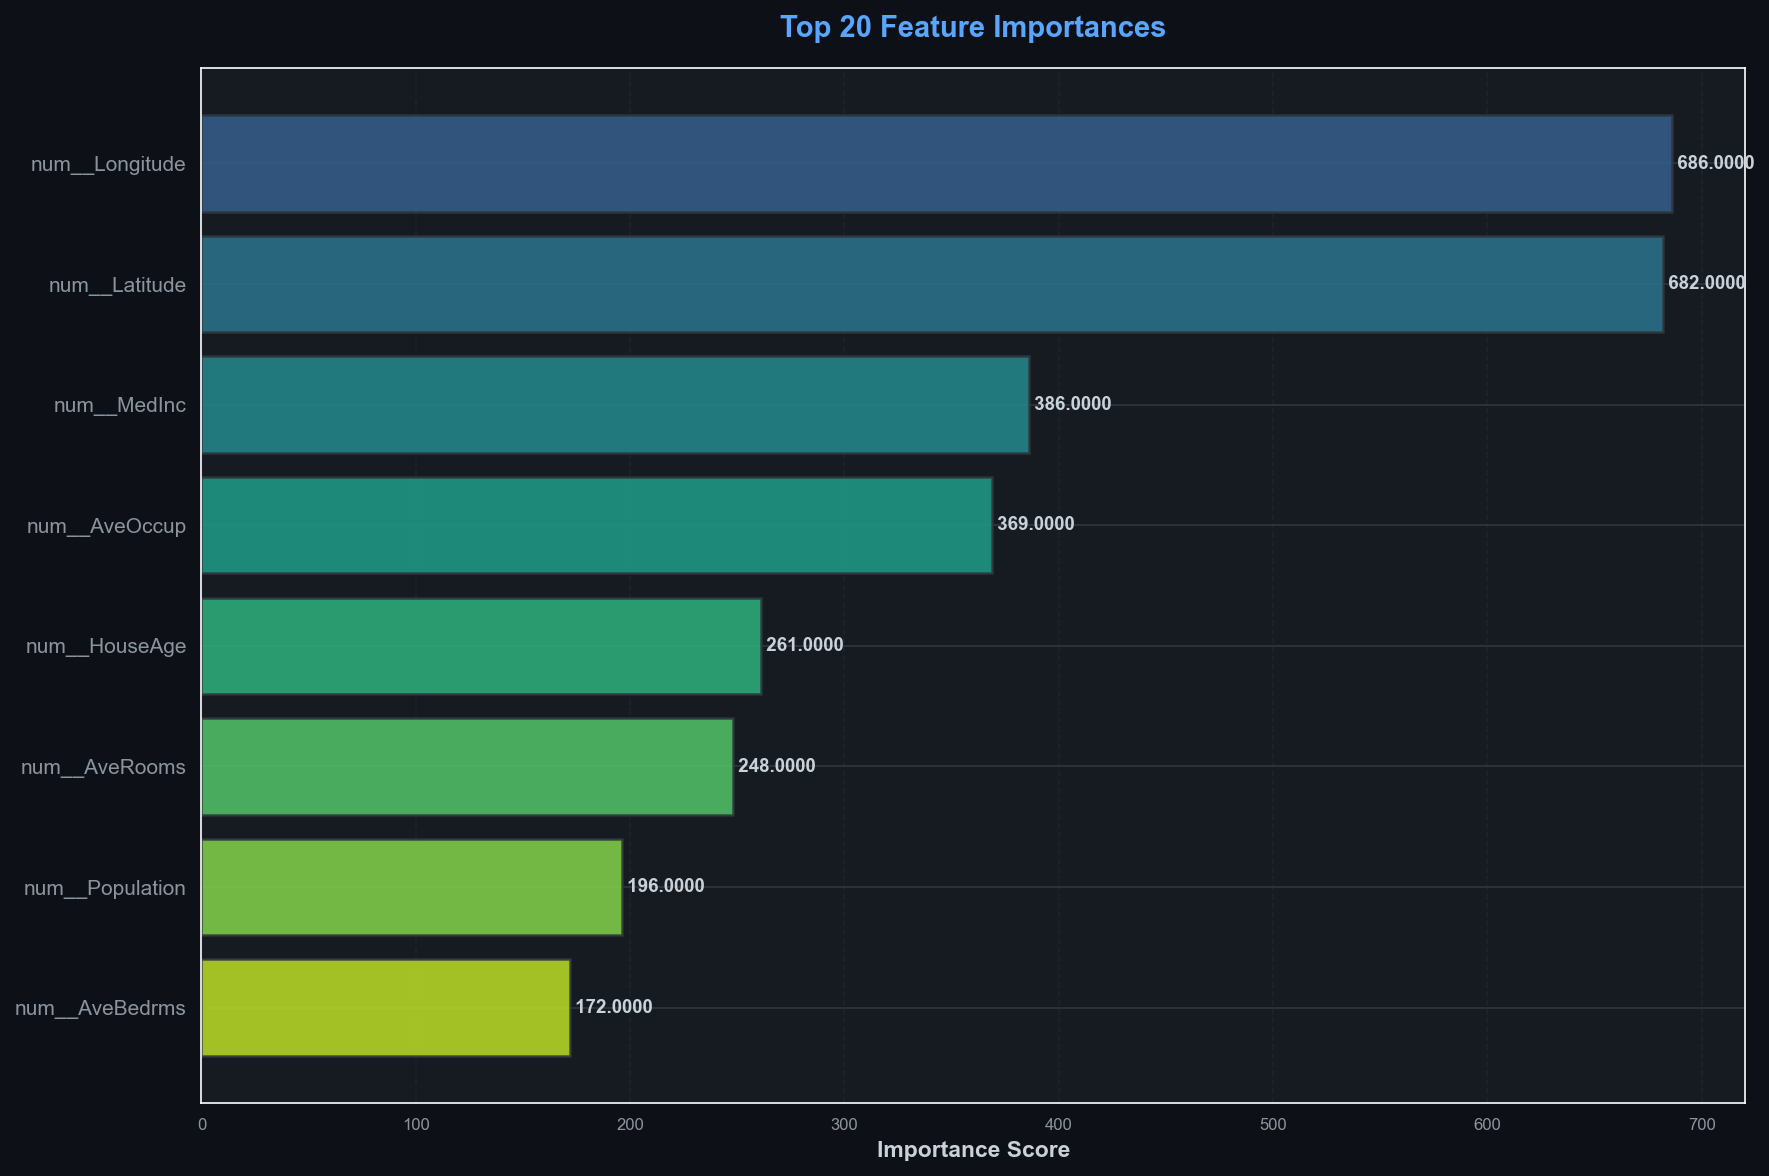
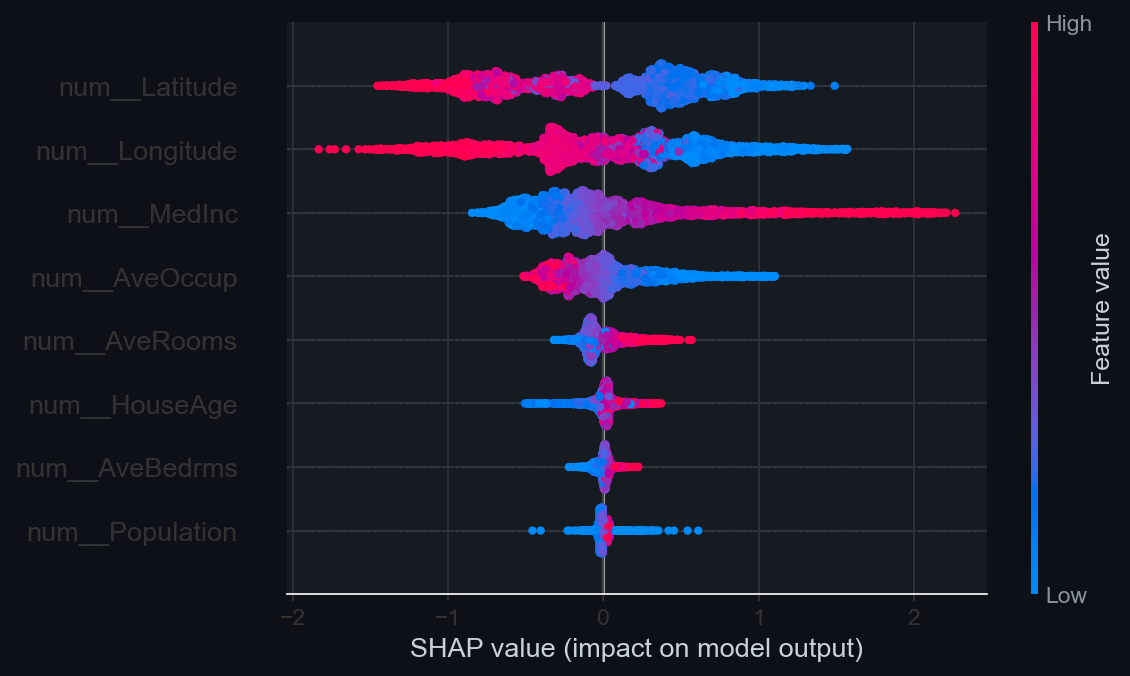

INFO:root:Report displayed successfully.


In [7]:
manualml = NoventisManualML(
    model_name=['linear_regression', 'random_forest', 'lightgbm'],
    task='regression',           
)

results = manualml.fit(
    df=df_housing,
    target_column='MedHouseVal',
)

> # ManualML With Hyperparameter tunning

<h2> Classification

INFO:root:ManualPredictor initialized for classification
INFO:root:Starting ManualPredictor Training Pipeline
INFO:root:Data split: Train=569, Test=143
INFO:root:Running internal preprocessor...
INFO:root:Internal preprocessing complete. All data is now numeric.
INFO:root:Processing model: XGBOOST
INFO:root:Starting hyperparameter tuning for XGBOOST...
INFO:root:Displaying tuning visualizations for XGBOOST...


INFO:root:Tuning complete. Best parameters: {'n_estimators': 1784, 'learning_rate': 0.01904959581251055, 'max_depth': 11, 'subsample': 0.6869098595605435, 'colsample_bytree': 0.7252951053543077, 'gamma': 1.874083984886492}
INFO:root:Training finished in 1.32 seconds.
INFO:root:Process Complete!
INFO:root:Best Model: XGBOOST with f1_score = 0.7732


MODEL COMPARISON - ALL METRICS
         accuracy  precision    recall  f1_score
model                                           
xgboost  0.783217   0.781929  0.783217  0.773236


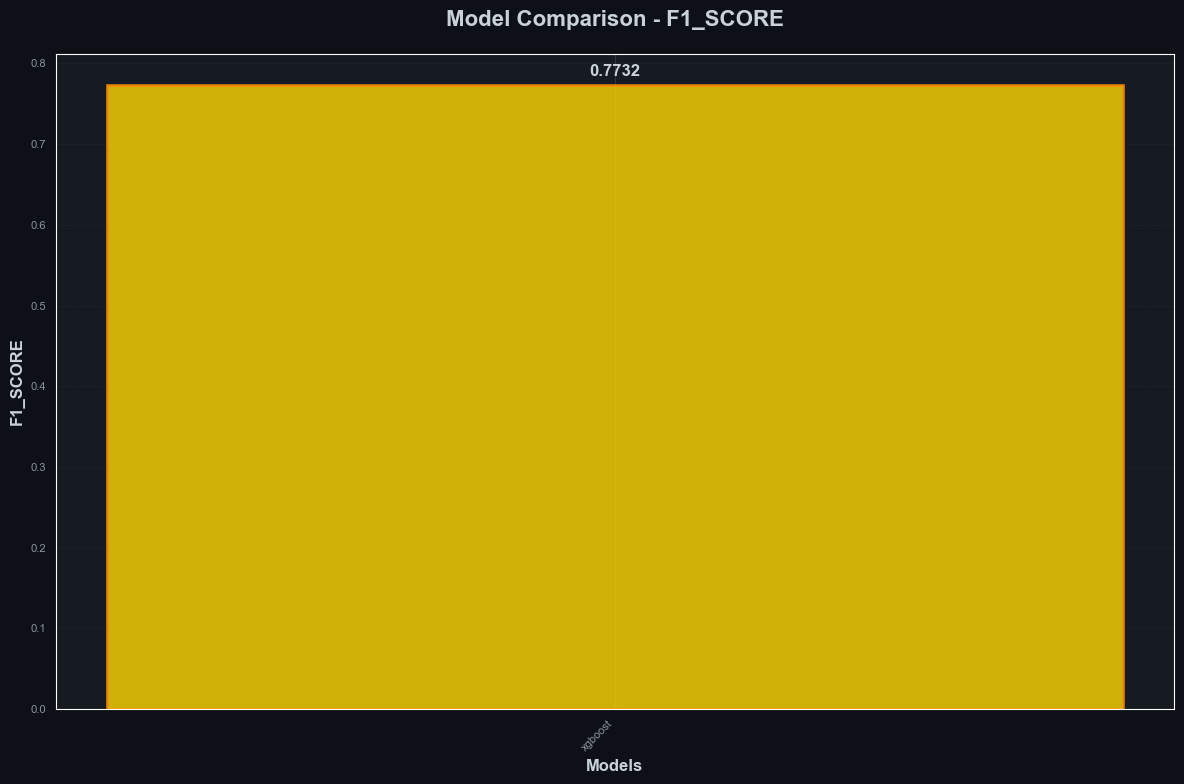

INFO:root:Preparing report for display in output cell...


,accuracy,precision,recall,f1_score
model,,,,
xgboost,0.7832,0.7819,0.7832,0.7732

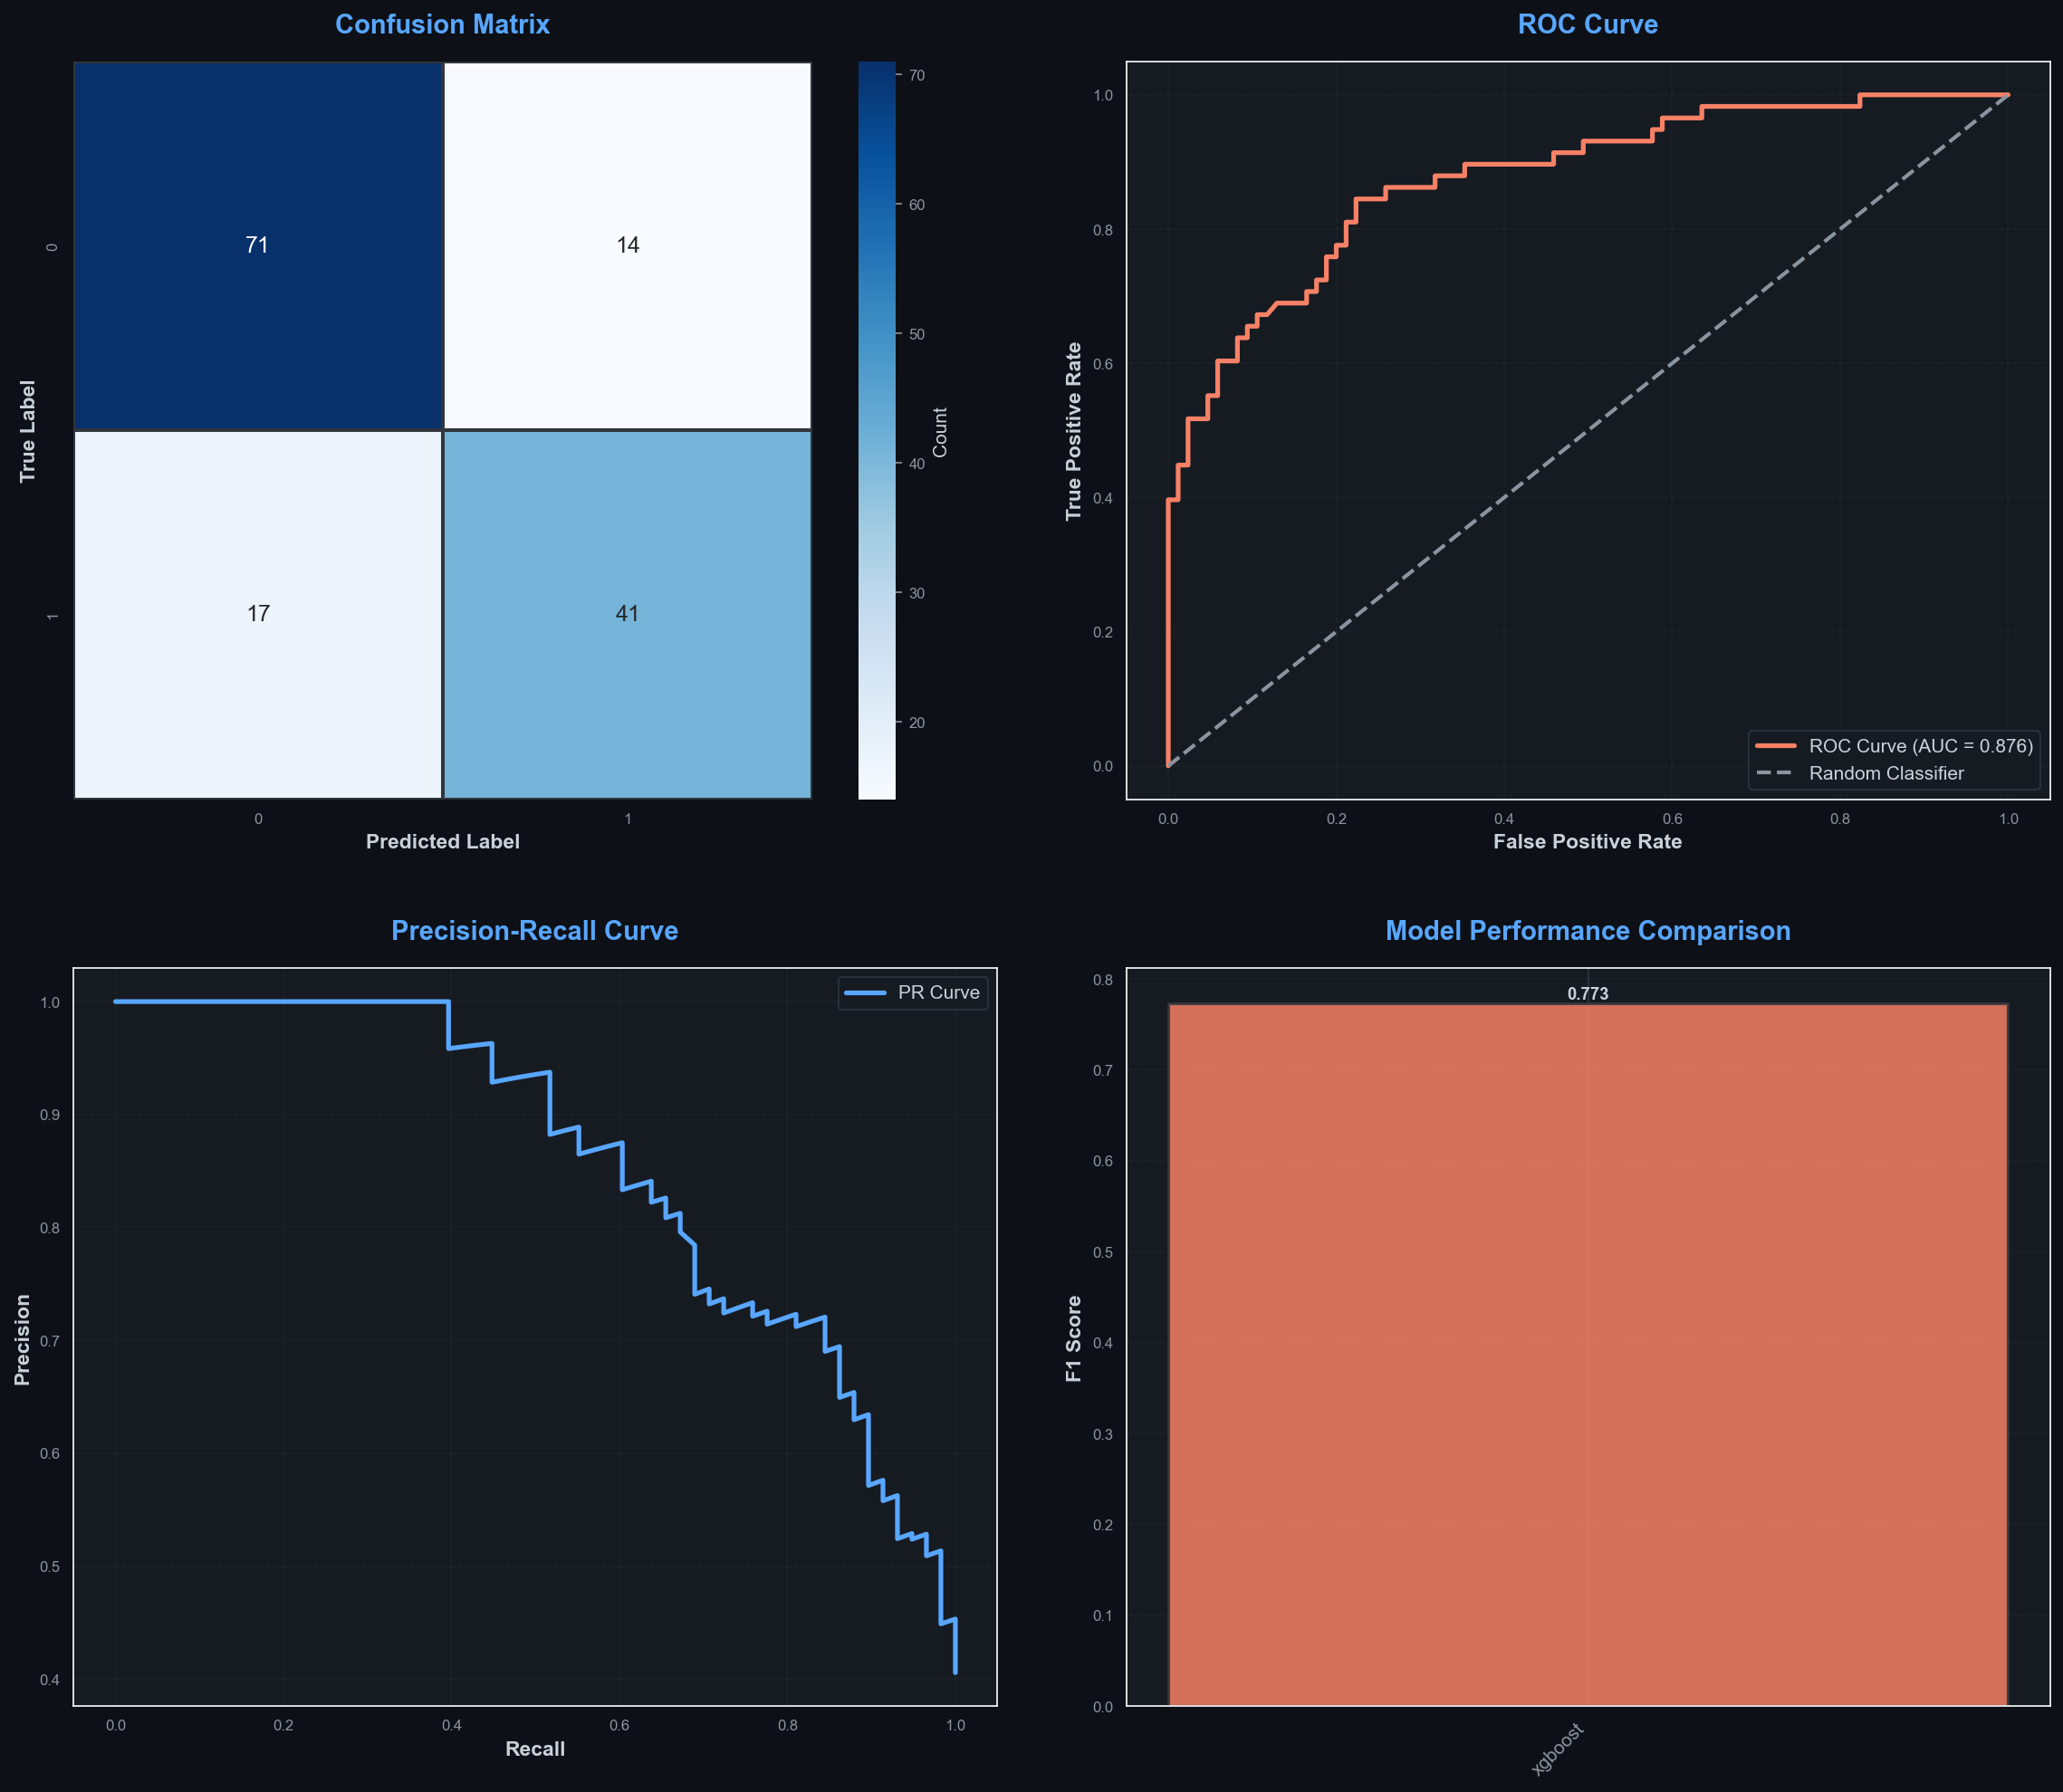
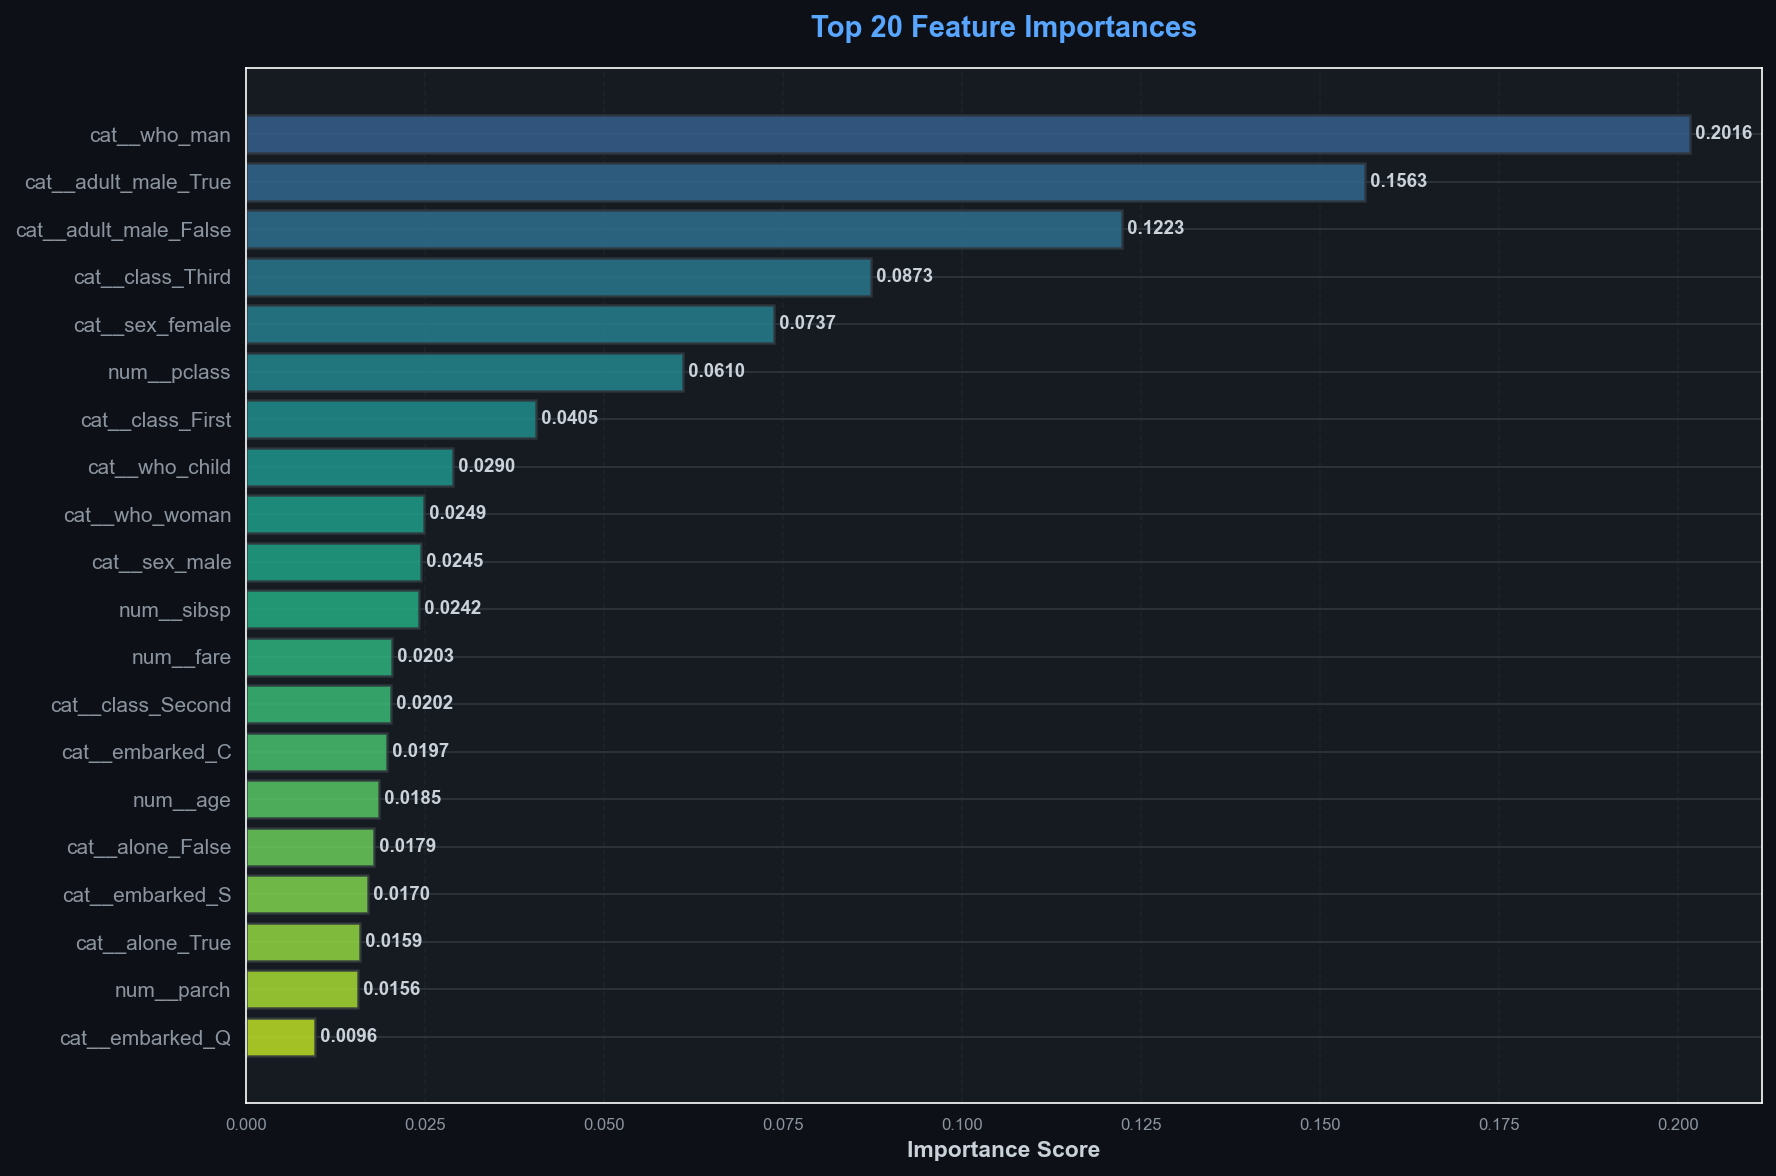
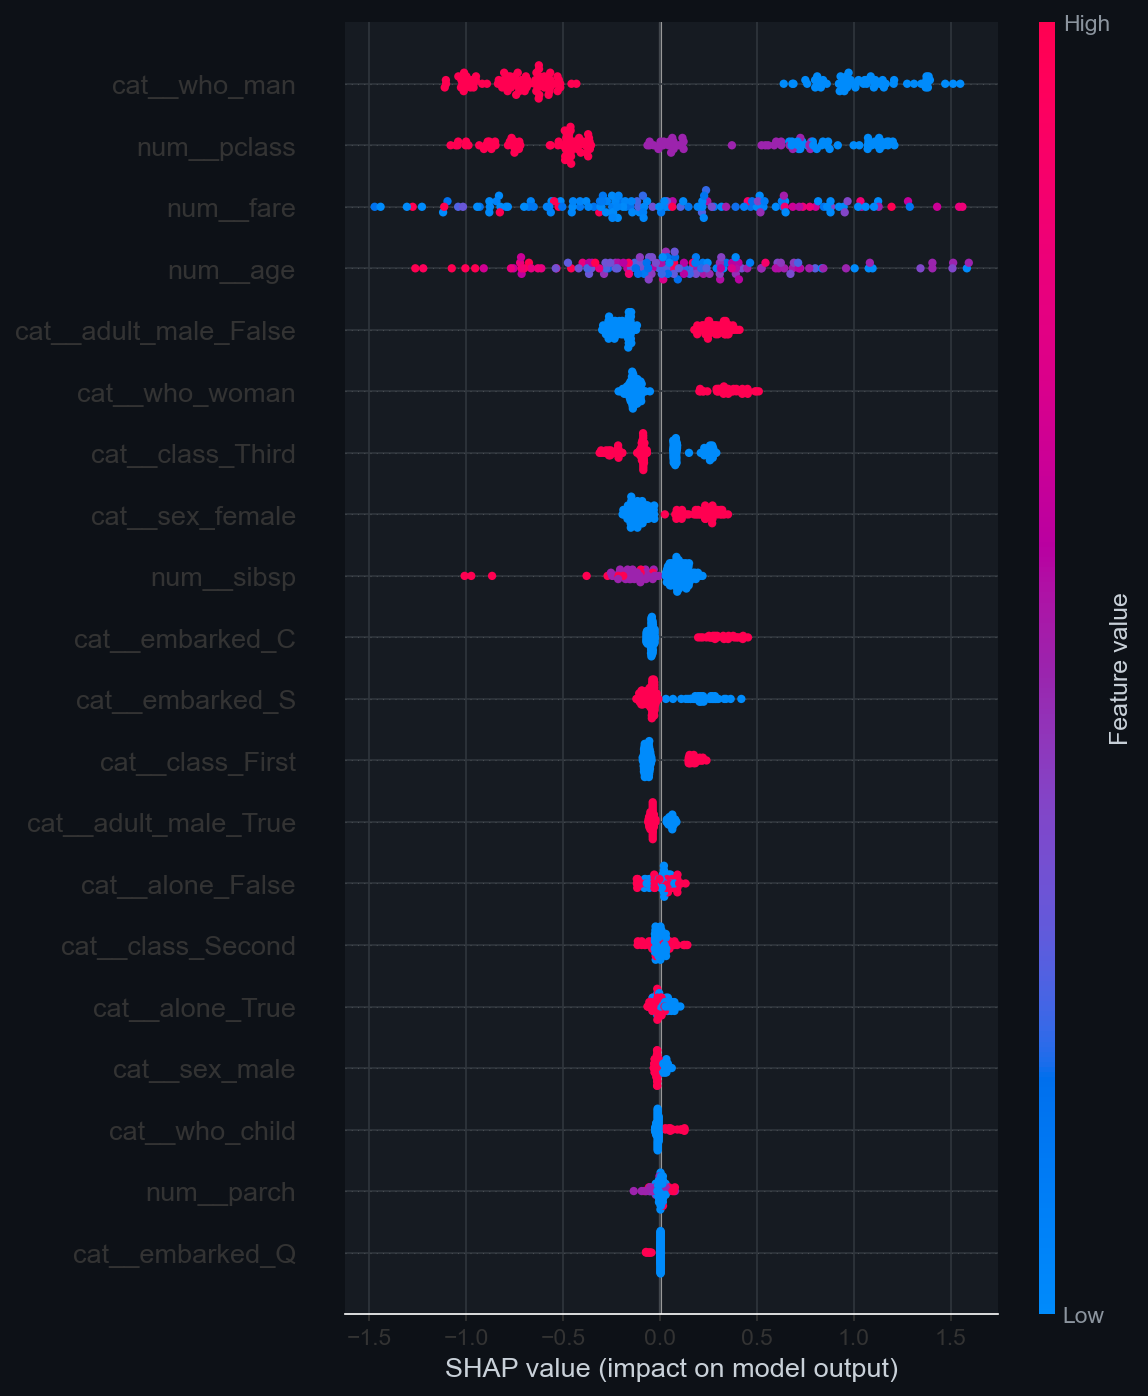

INFO:root:Report displayed successfully.


In [8]:
manualml_tunning =NoventisManualML(
    model_name='xgboost',
    task='classification',
    tune_hyperparameters=True,  
    n_trials=50,                
    cv_folds=5,                 
    show_tuning_plots=True,     
    random_state=42
)

results = manualml_tunning.fit(
    df=df_titanic_clean,
    target_column='survived',
    display_report=True,
    compare=True,
    explain=True,
)

<h2> Regression

INFO:root:ManualPredictor initialized for regression
INFO:root:Starting ManualPredictor Training Pipeline
INFO:root:Data split: Train=16512, Test=4128
INFO:root:Running internal preprocessor...
INFO:root:Internal preprocessing complete. All data is now numeric.
INFO:root:Processing model: XGBOOST
INFO:root:Starting hyperparameter tuning for XGBOOST...
INFO:root:Displaying tuning visualizations for XGBOOST...


INFO:root:Tuning complete. Best parameters: {'n_estimators': 1964, 'learning_rate': 0.02432602819576622, 'max_depth': 8, 'subsample': 0.8483992221835396, 'colsample_bytree': 0.6964012976987608}
INFO:root:Training finished in 19.10 seconds.
INFO:root:Process Complete!
INFO:root:Best Model: XGBOOST with r2_score = 0.8597


MODEL COMPARISON - ALL METRICS
              mae      mse     rmse  r2_score
model                                        
xgboost  0.277501  0.18381  0.42873  0.859731


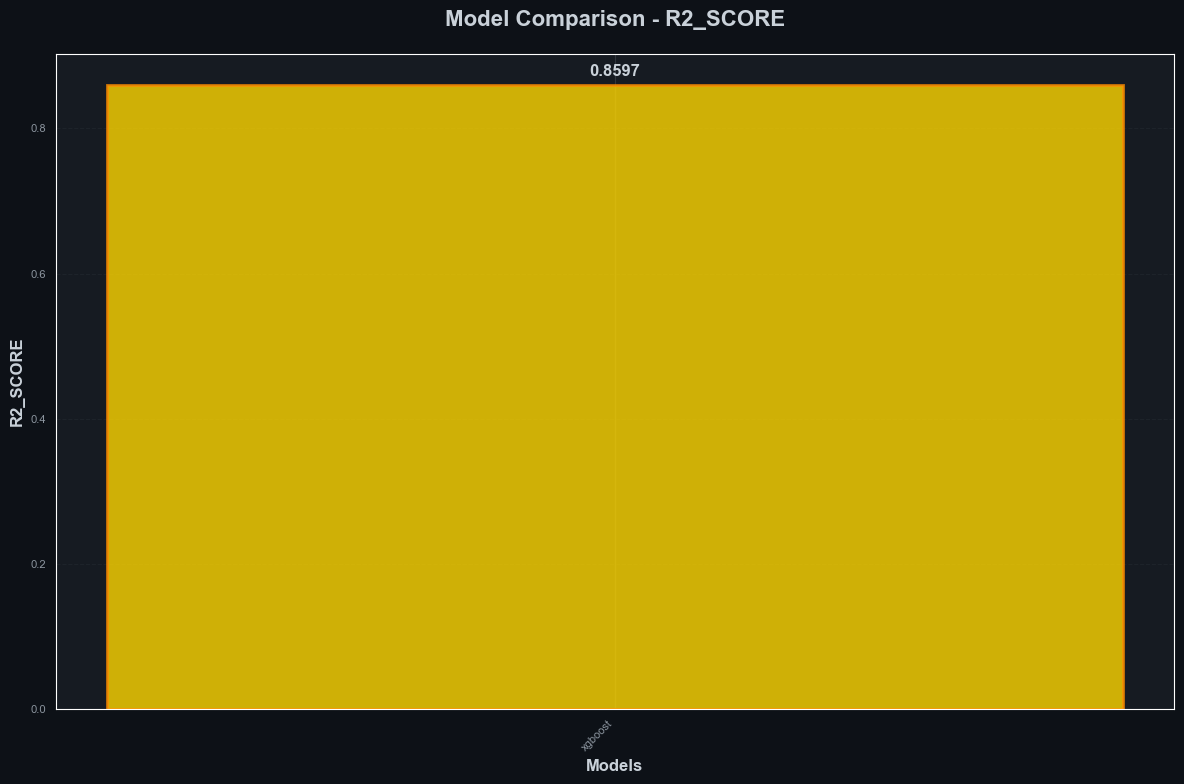

INFO:root:Preparing report for display in output cell...
100%|===================| 4122/4128 [11:19<00:00]        

,mae,mse,rmse,r2_score
model,,,,
xgboost,0.2775,0.1838,0.4287,0.8597

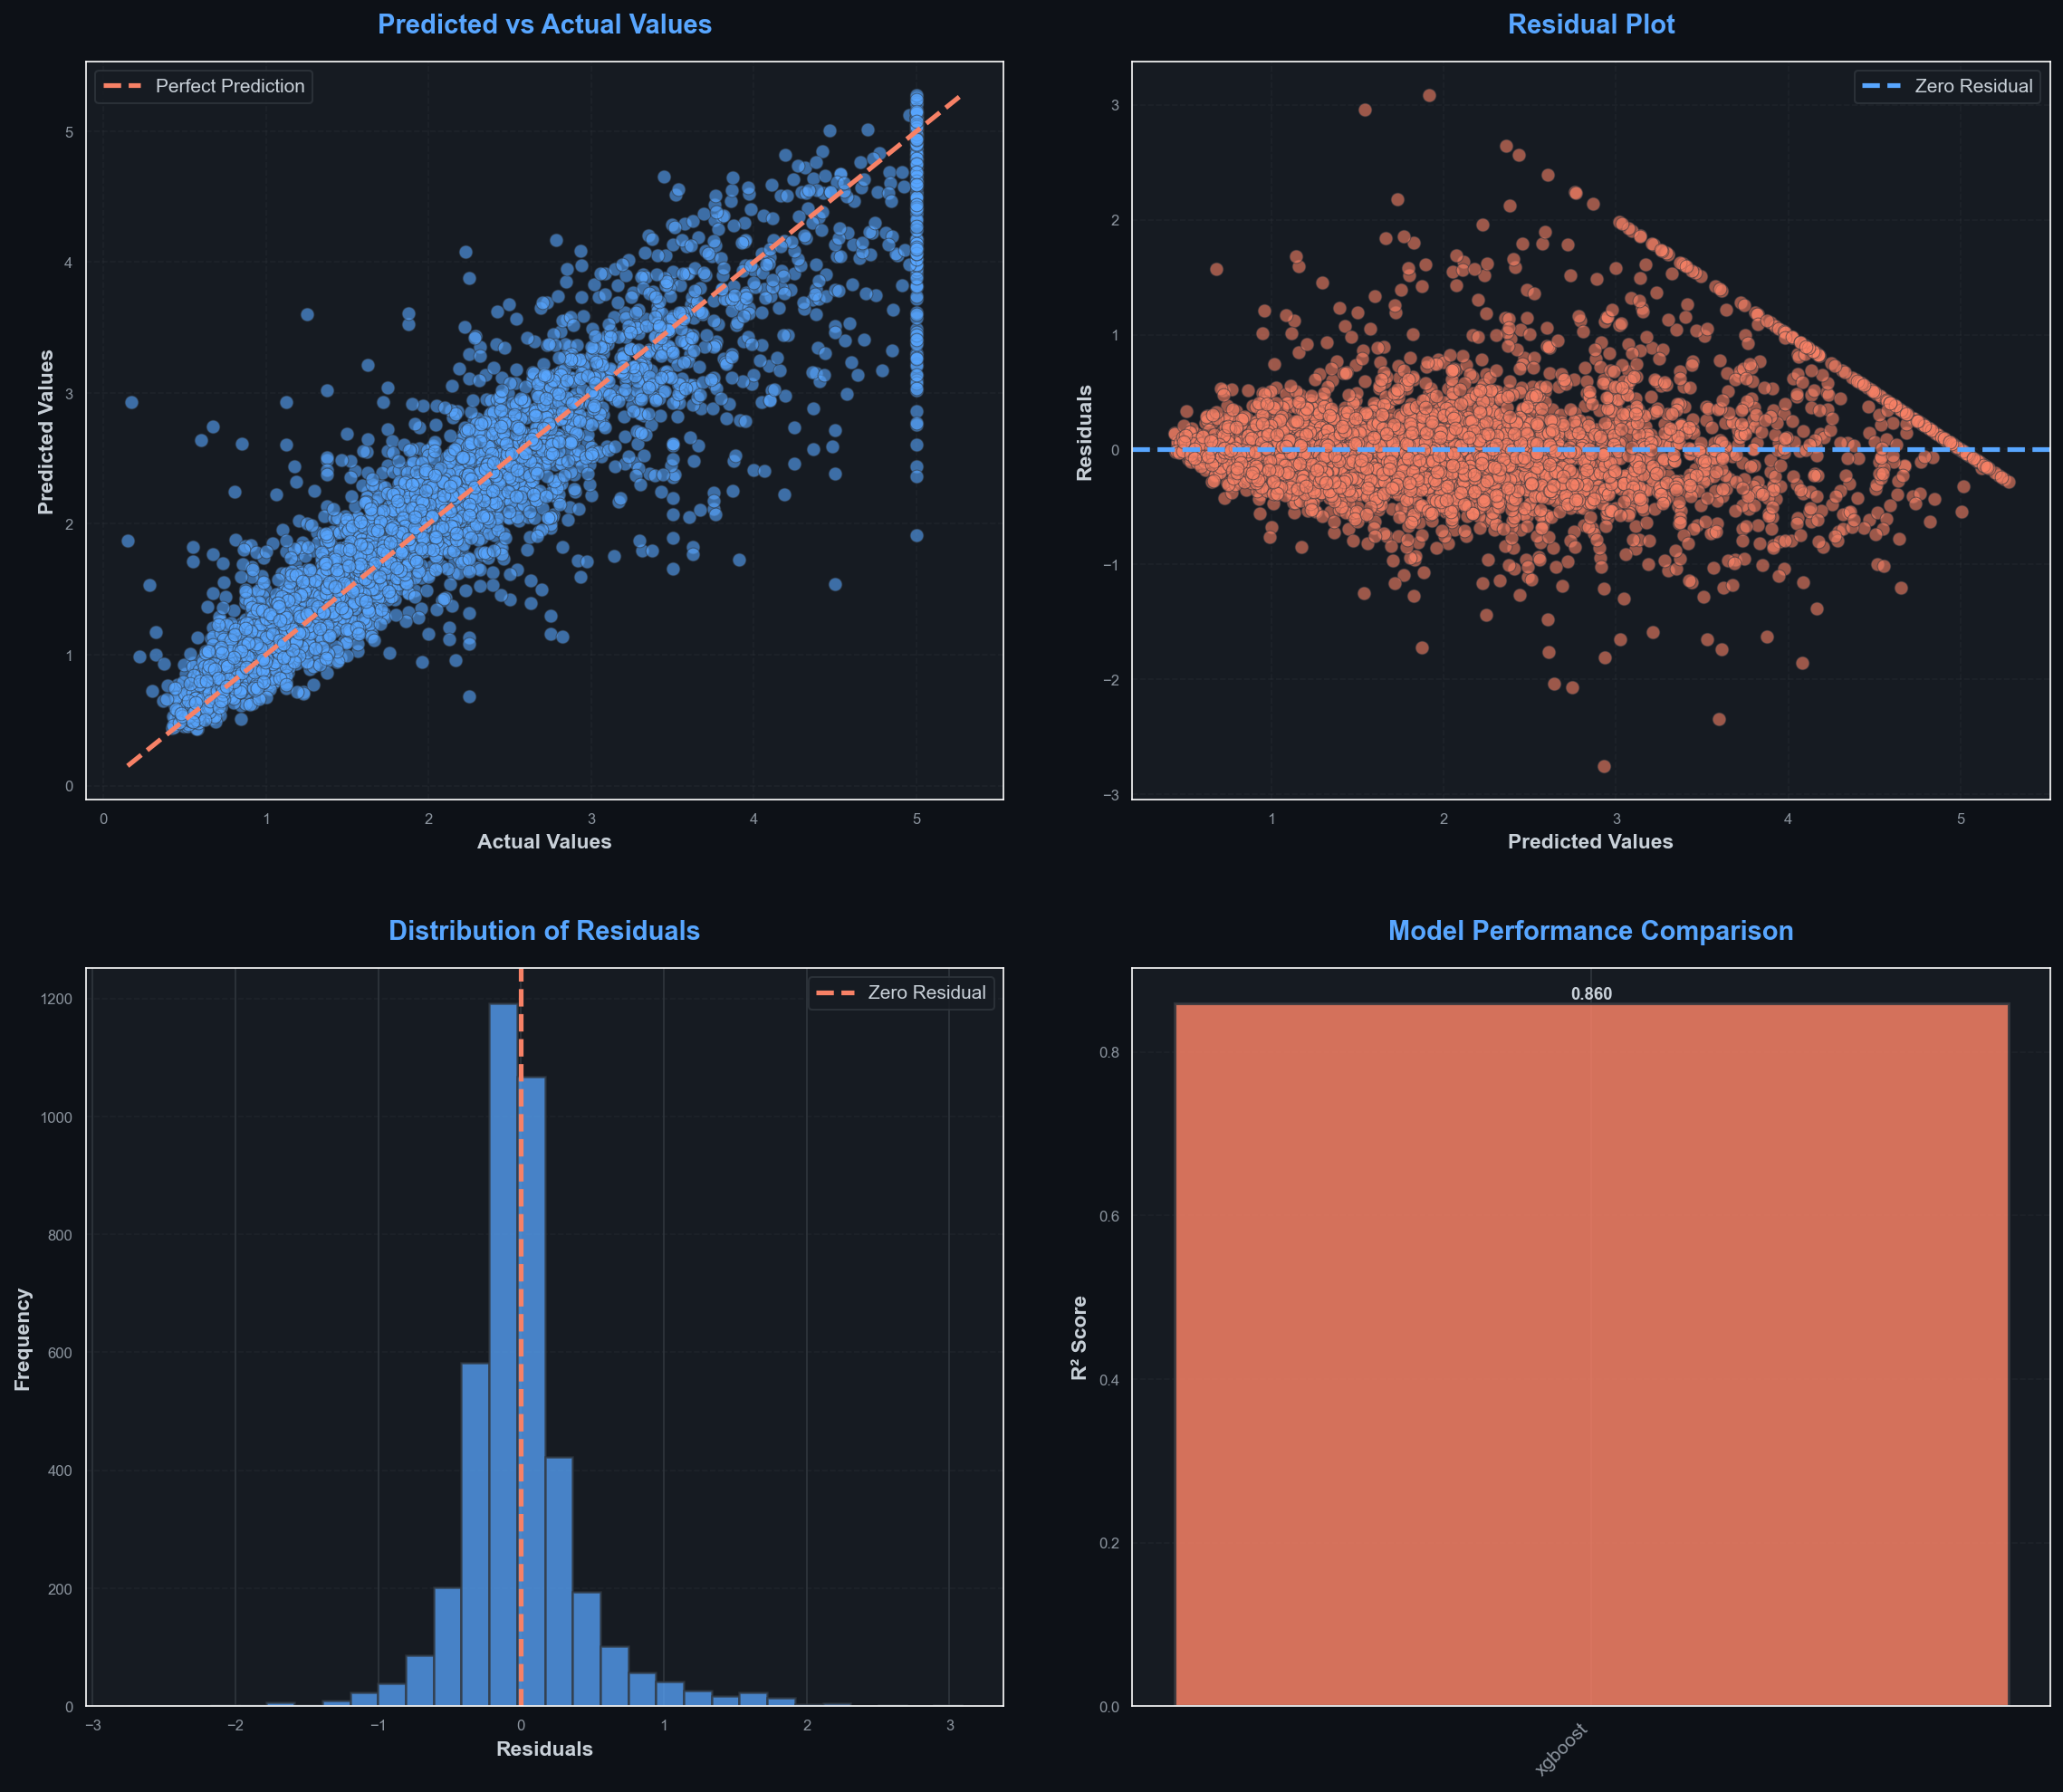
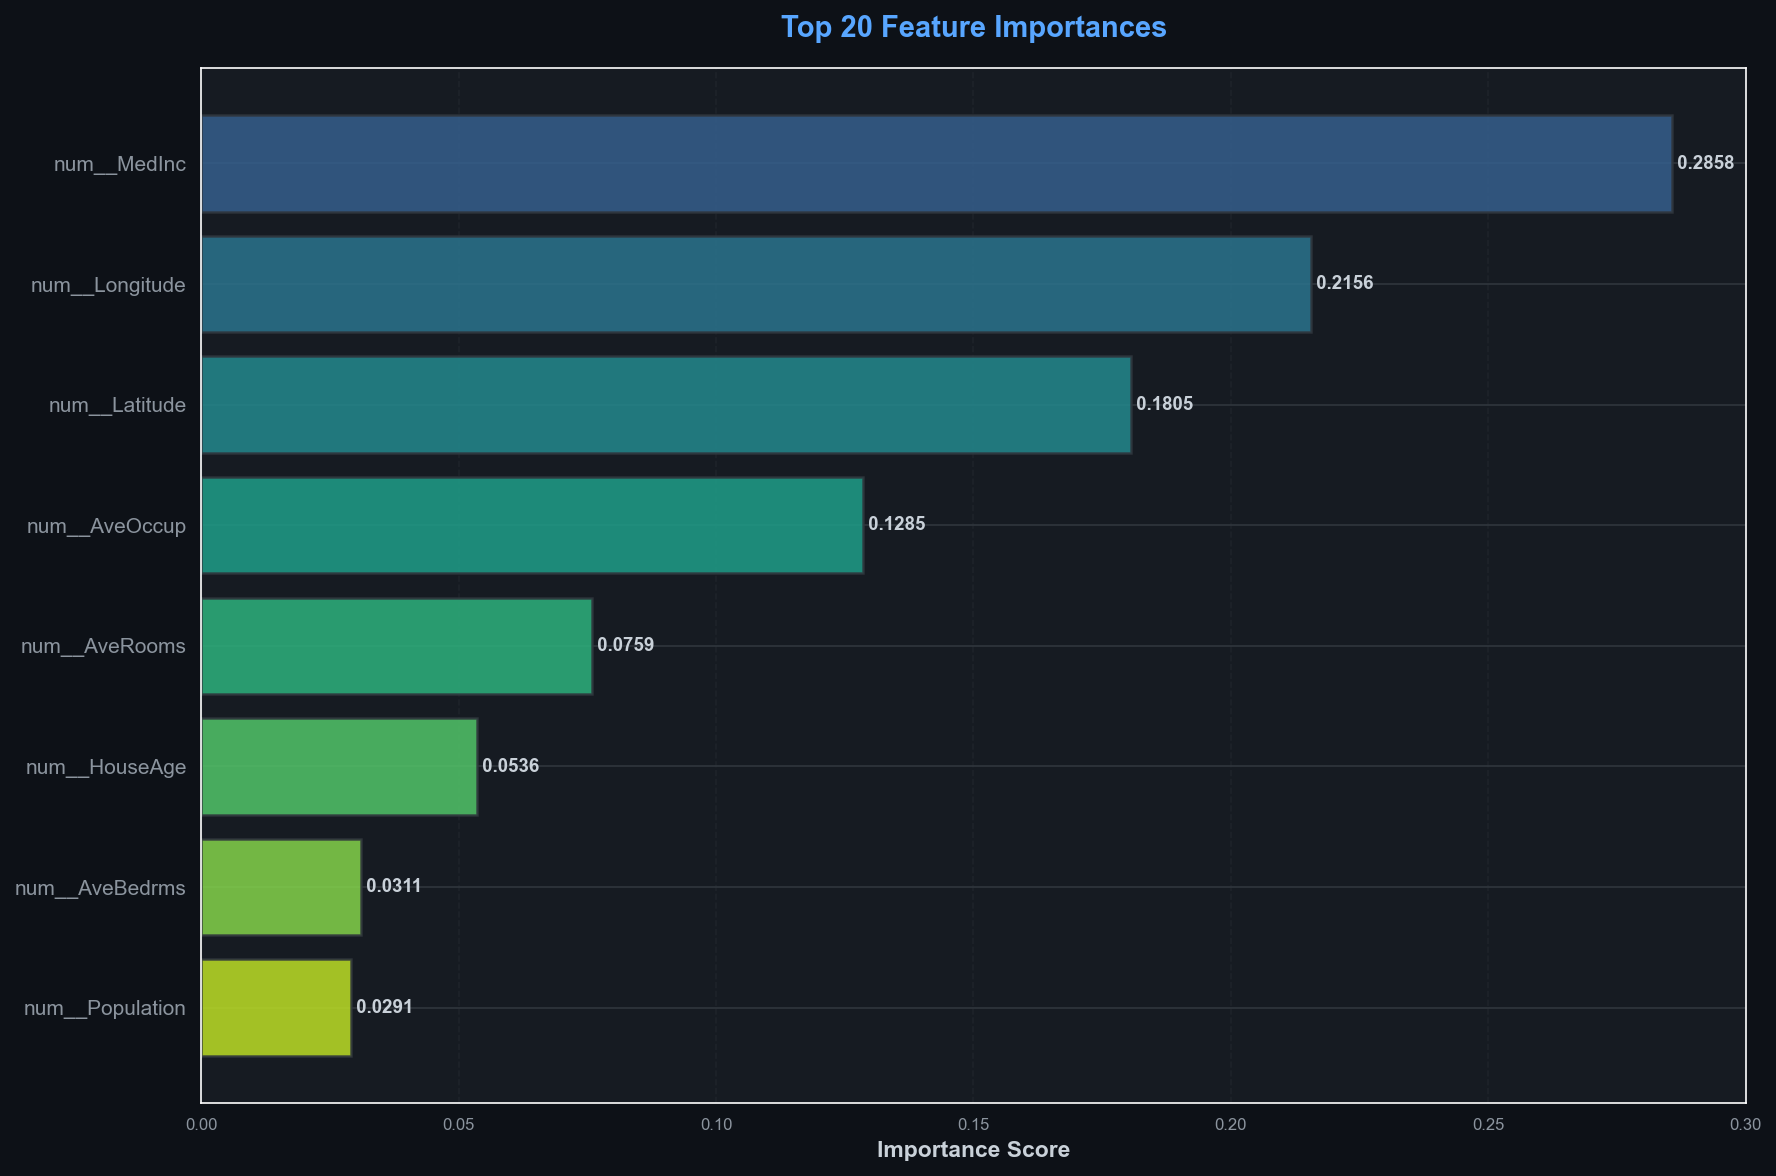
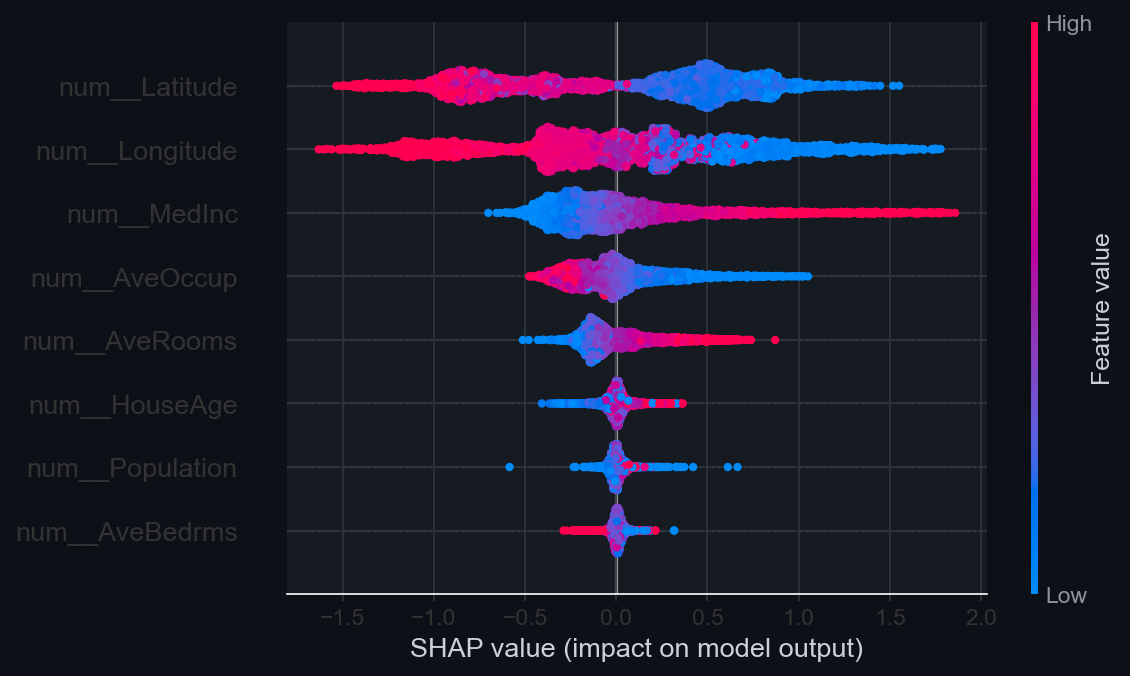

INFO:root:Report displayed successfully.


In [9]:
manualml = NoventisManualML(
    model_name='xgboost',
    task='regression',
    tune_hyperparameters=True,  
    n_trials=50,             
    cv_folds=5,               
    show_tuning_plots=True,     
    random_state=42
)

results = manualml.fit(
    df=df_housing,
    target_column='MedHouseVal',
    display_report=True,
    compare=True,
    explain=True,
)

> # Save and use your model

In [10]:
manualml .save_model(filepath='best_xgboost_model.pkl')

loaded_model = NoventisManualML.load_model(filepath='best_xgboost_model.pkl')
print(f"Model {type(loaded_model)} successfully loaded.")

# predictions = manualml .predict(X_new=new_data)

# print("\nPredictions for new data:")
# print(predictions['predictions'])

INFO:root:Saving model 'xgboost' to best_xgboost_model.pkl...
INFO:root:Model saved successfully.
INFO:root:Loading model from best_xgboost_model.pkl...
INFO:root:Model loaded successfully.


Model <class 'xgboost.sklearn.XGBRegressor'> successfully loaded.
